In [2]:
# Import the main libraries
import pandas as pd
import numpy as np
import base64
import os
#import torch 
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import glob
import matplotlib.pyplot as plt

In [17]:
zinc20 = pd.read_csv('../data/final_zinc_08.csv')
zinc20[zinc20['XLOGP3']<5]

,smiles,zinc_id,Canonical SMILES,Formula,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,...,Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
0,Nc1ccn([C@@H]2O[C@@H](CO)[C@@H](O)[C@@H]2O)c(=...,ZINC000003830626,OC[C@@H]1O[C@H]([C@H]([C@@H]1O)O)n1ccc(nc1=O)N,C9H13N3O5,243.22,17.0,6.0,0.56,2.0,6.0,...,0.0,1.0,0.0,0.0,1.0,0.55,0.0,0.0,1.0,3.84
1,CC(=O)c1cccc(C(C)=O)c1,ZINC000002029853,CC(=O)c1cccc(c1)C(=O)C,C10H10O2,162.19,12.0,6.0,0.20,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.55,0.0,0.0,1.0,1.02
2,Nc1cccc2c1C(=O)c1ccccc1-2,ZINC000000134469,Nc1cccc2c1C(=O)c1c2cccc1,C13H9NO,195.22,15.0,12.0,0.00,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.55,1.0,1.0,1.0,2.08
3,Cc1cc(C)nc(NS(=O)(=O)c2ccc(N)cc2)n1,ZINC000000057494,Nc1ccc(cc1)S(=O)(=O)Nc1nc(C)cc(n1)C,C12H14N4O2S,278.33,19.0,12.0,0.17,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.55,0.0,1.0,0.0,2.48
4,COC(=O)c1c2ccccc2cc2ccccc21,ZINC000000400397,COC(=O)c1c2ccccc2cc2c1cccc2,C16H12O2,236.27,18.0,14.0,0.06,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.55,0.0,1.0,2.0,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C=C(C)C4=CC...,ZINC000003938628,CC(=O)O[C@@]1(CC[C@@H]2[C@]1(C)CC[C@H]1[C@H]2C...,C23H30O4,370.48,27.0,0.0,0.70,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.55,0.0,0.0,1.0,5.09
3112,C=C1CC[C@@H]2[C@](C)(CO)[C@@H](O)CC[C@@]2(C)[C...,ZINC000048016692,OC[C@]1(C)[C@@H](O)CC[C@@]2([C@@H]1CCC(=C)[C@H...,C20H30O5,350.45,25.0,0.0,0.75,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.55,0.0,2.0,1.0,5.06
3114,C[C@@H](CCCO)[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4C[C...,ZINC000118930822,OCCC[C@@H]([C@H]1CC[C@@H]2[C@]1(C)CC[C@H]1[C@H...,C24H42O2,362.59,26.0,0.0,1.00,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.55,0.0,0.0,2.0,4.75
3115,COC(=O)CC[C@H](C)[C@H]1CC[C@@H]2[C@H]3[C@H](O)...,ZINC000253497633,COC(=O)CC[C@@H]([C@H]1CC[C@H]2[C@]1(C)[C@@H](O...,C25H42O5,422.60,30.0,0.0,0.96,5.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.55,0.0,0.0,1.0,5.17


(array([ 60., 177., 417., 743., 795., 549., 205., 105.,  54.,  13.]),
 array([-3.24 , -1.877, -0.514,  0.849,  2.212,  3.575,  4.938,  6.301,
         7.664,  9.027, 10.39 ]),
 <BarContainer object of 10 artists>)

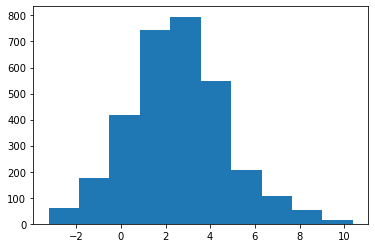

In [16]:
plt.hist(zinc20['XLOGP3'])

In [21]:
a=zinc20[zinc20['iLOGP']>2.1]
#a=a[a['XLOGP3']<5]
#a['iLOGP'].max()
a

,smiles,zinc_id,Canonical SMILES,Formula,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,...,Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
4,COC(=O)c1c2ccccc2cc2ccccc21,ZINC000000400397,COC(=O)c1c2ccccc2cc2c1cccc2,C16H12O2,236.27,18.0,14.0,0.06,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.55,0.0,1.0,2.0,1.28
5,CN(C)c1ccc(N=O)cc1,ZINC000003860417,O=Nc1ccc(cc1)N(C)C,C8H10N2O,150.18,11.0,6.0,0.25,2.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.55,1.0,0.0,1.0,1.19
6,c1ccc2c(c1)Nc1ccccc1S2,ZINC000100009616,c1ccc2c(c1)Sc1c(N2)cccc1,C12H9NS,199.27,14.0,12.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.55,1.0,0.0,2.0,2.70
7,CN1CCCC[C@H]1c1cccnc1,ZINC000000517556,CN1CCCC[C@H]1c1cccnc1,C11H16N2,176.26,13.0,6.0,0.55,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.55,0.0,0.0,1.0,2.17
15,O=C(/C=C\c1ccc(O)c(O)c1)OCCc1ccccc1,ZINC000007996909,O=C(/C=C\c1ccc(c(c1)O)O)OCCc1ccccc1,C17H16O4,284.31,21.0,12.0,0.12,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.55,1.0,2.0,1.0,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,Nc1ccc(C2(c3ccc(N)cc3)c3ccccc3C(=O)c3ccccc32)cc1,ZINC000004818967,Nc1ccc(cc1)C1(c2ccc(cc2)N)c2ccccc2C(=O)c2c1cccc2,C26H20N2O,376.45,29.0,24.0,0.04,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.55,1.0,1.0,2.0,3.24
3113,CC(C)CCC[C@H](C)[C@H]1CC[C@H]2[C@H]3CC[C@H]4C[...,ZINC000005230575,CC(CCC[C@@H]([C@H]1CC[C@@H]2[C@]1(C)CC[C@@H]1[...,C26H46O,374.64,27.0,0.0,1.00,5.0,1.0,...,1.0,2.0,0.0,1.0,2.0,0.55,0.0,0.0,2.0,4.95
3115,COC(=O)CC[C@H](C)[C@H]1CC[C@@H]2[C@H]3[C@H](O)...,ZINC000253497633,COC(=O)CC[C@@H]([C@H]1CC[C@H]2[C@]1(C)[C@@H](O...,C25H42O5,422.60,30.0,0.0,0.96,5.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.55,0.0,0.0,1.0,5.17
3116,CC(=O)O[C@]1(C(C)=O)CC[C@@H]2[C@@H]3C=C(C)C4=C...,ZINC000003874188,O=C1CC[C@]2(C(=C1)C(=C[C@@H]1[C@H]2CC[C@@]2([C...,C24H32O4,384.51,28.0,0.0,0.71,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.55,0.0,0.0,1.0,5.21
